## OCI GenAI でマルチモーダルモデル(Llama 3.2 Vision)をLangChainで実装するサンプルコード
画像データと、画像データの説明を求めるプロンプトを入力し、応答テキストを得るサンプルコードです。
犬の写真(dog.jpeg)と「この写真を日本語で説明してください。」というプロンプトを入力し、犬種など画像に映っている内容の説明を応答テキストを出力するコードです。

ライブラリをインストールします。
※下記ライブラリの古いバージョンでは動作しませんのでアップデートインストール必須

In [ ]:
!pip install -U pip oci langchain langchain-community

必要なクラスをインポートします。

In [ ]:
from langchain_community.chat_models.oci_generative_ai import ChatOCIGenAI
from langchain_core.messages import HumanMessage
from IPython.display import Image, display # 画像ファイルの表示(オプション)
import base64 # 画像ファイルをbase64フォーマットでエンコード
import os

チャットモデル(OCIのllama 3.2 Vision)を定義します。service_endpoinやcompartment_idは自身の環境の値をセットする必要があります。

In [ ]:

chat = ChatOCIGenAI(
    model_id="meta.llama-3.2-90b-vision-instruct",
    service_endpoint="https://inference.generativeai.us-chicago-1.oci.oraclecloud.com",
    compartment_id="ocid1.compartment.oc1..aaaaaaaa4azic6bp7obsfusyfkzismjvqhx2vwfyp3kkskxcg4cvkkc7lsjq",
    model_kwargs={"temperature": 0.7, "max_tokens": 1000},
)

In [ ]:
マルチモーダルモデルを利用する際、APIでCallする場合は入力画像をbase64フォーマットでエンコードする必要があります。
ローカルに配置したdog.jpegを読み込みエンコードします。

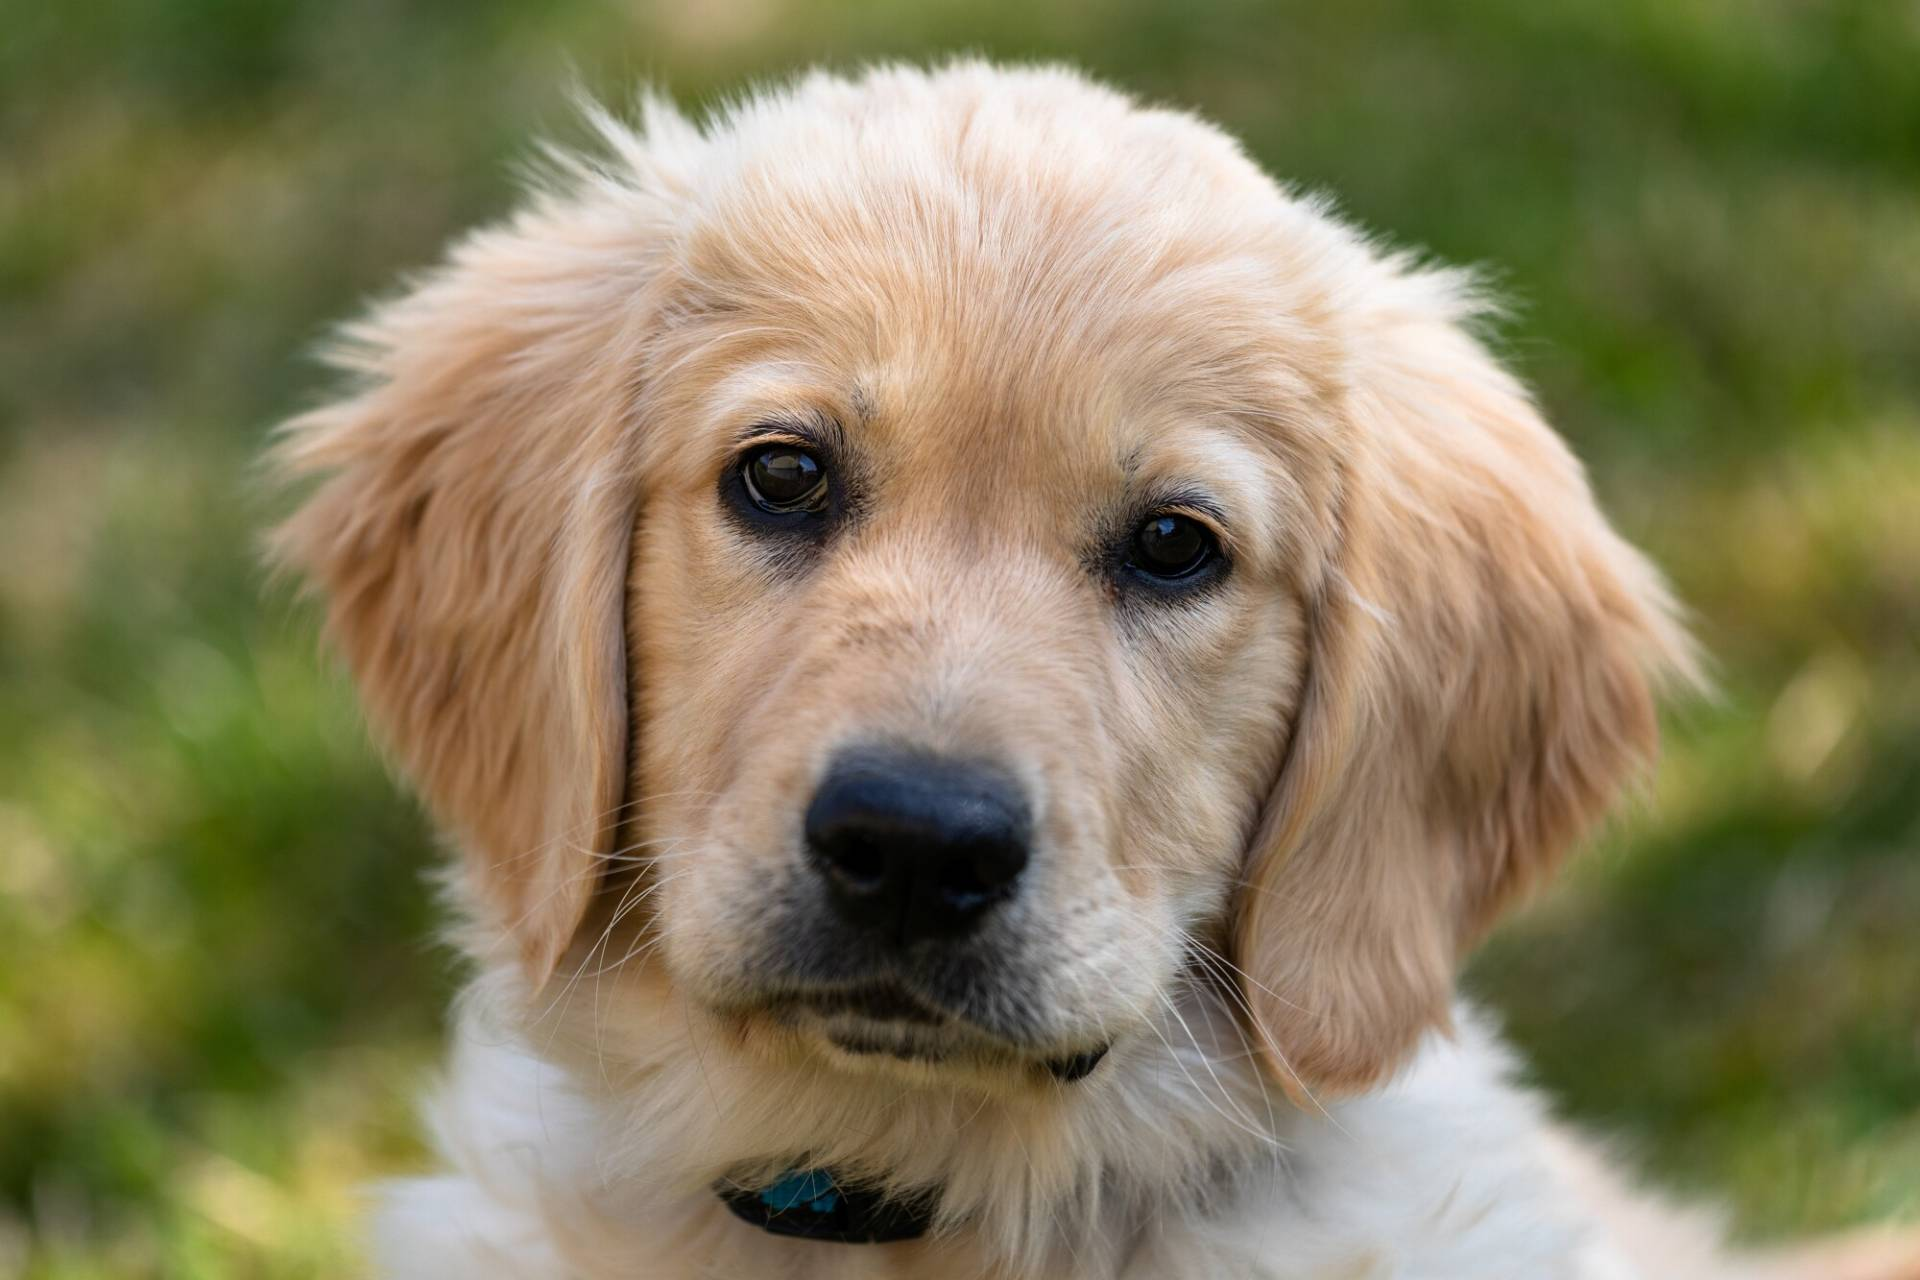

In [ ]:

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "/home/opc/llama32vision/dog.jpeg"
display(Image(filename=image_path))
base64_image = encode_image(image_path)

エンコードした画像データを含むプロンプトを定義し、チャットモデル(Llama 3.2 Vision)に入力し応答テキストを得ます。この例では画像データの内容について説明をするプロンプトとしています。

In [ ]:
message = HumanMessage(
    content=[
        {"type": "text", "text": "この写真を日本語で説明してください。"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)

response = chat.invoke([message])
print(response.content)

この写真は、犬の顔写真です。犬の種類はゴールデンレトリバーです。犬の顔は、犬の顔の特徴である、毛の長い耳、黒い小さな鼻、茶色のまぶた、黒いまつ毛が写っています。この写真は、犬の顔のアップショットのような写真です。犬の顔から写っている部分は、耳と首の後ろ部分です。背景は、犬の頭よりもはるかにぼんやりしています。犬の頭の周りには、犬の頭よりも暗い色の犬の毛が写っています。背景は、犬の頭よりもはるかにぼんやりしています。犬の頭の周りには、犬の頭よりも暗い色の犬の毛が写っています。


## 参考URL
https://python.langchain.com/docs/integrations/chat/oci_generative_ai/
https://python.langchain.com/docs/how_to/multimodal_inputs/